<a href="https://colab.research.google.com/github/agaonsindhe/mab_ctr/blob/main/MAB_Click_Through_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `---------------Mandatory Information to fill------------`

### Group ID:
### Group Members Name with Student ID:
1. Anshuman Gaonsinde - 2023ab05150
2. Amit Kumar - 2023aa05262
3. Vishal Pankaj - 2023aa05260
4. Sidhant


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Background

In digital advertising, Click-Through Rate (CTR) is a critical metric that measures the effectiveness of an advertisement. It is calculated as the ratio of users who click on an ad to the number of users who view the ad. A higher CTR indicates more successful engagement with the audience, which can lead to increased conversions and revenue. From time-to-time advertisers experiment with various elements/targeting of an ad to optimise the ROI.

# Scenario

Imagine an innovative digital advertising agency, AdMasters Inc., that specializes in maximizing click-through rates (CTR) for their clients' advertisements. One of their clients has identified four key tunable elements in their ads: *Age*, *City*, *Gender*, and *Mobile Operating System (OS)*. These elements significantly influence user engagement and conversion rates. The client is keen to optimize their CTR while minimizing resource expenditure.

# Objective

Optimize the CTR of digital ads by employing Multi Arm Bandit algorithms. System should dynamically and efficiently allocate ad displays to maximize overall CTR.


# Dataset

The dataset for Ads contains 4 unique features/characteristics.
*   Age (Range: 25:50)
*   City (Possible Values: &#39;New York&#39;, &#39;Los Angeles&#39;, &#39;Chicago&#39;,&#39;Houston&#39;, &#39;Phoenix&#39;)
*   Gender (Possible Values: &#39;Male&#39;, &#39;Female&#39;)
*   OS: (Possible Values: &#39;iOS&#39;, &#39;Android&#39;, &#39;Other&#39;)

***Link for accessing dataset:***
https://drive.google.com/file/d/1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys/view?usp=sharing


# Environment Details

**Arms:** Each arm represents a different ad from the dataset.

**Reward Function:**
* Probability of a Male clicking on an Ad -> 0.7 (randomly generated)
* Probability of a Female clicking on an Ad -> 0.6 (randomly generated)
* Once probabilities are assigned to all the values, create a final reward (clicked or not clicked binary outcome) based on the assumed probabilities in step 1 (by combining the probabilities of each feature value present in that ad)

**Assumptions**
* Assume alpha = beta = 1 for cold start
* Explore Percentage = 10%
* Run the simulation for min 1000 iterations


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [14]:
# Constants

epsilon = 0.1

# Define the possible values for each feature
ages = range(25, 51)
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
genders = ['Male', 'Female']
oss = ['iOS', 'Android', 'Other']

# Initialize value function and policy

# Initialize value function and policy

# Load Dataset

In [15]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------
import pandas as pd

# Load the dataset from the given URL
url = 'https://drive.google.com/uc?id=1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys'
data = pd.read_csv(url)

# Print dataset statistics
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Since there are no missing values, we proceed to encoding categorical variables
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender', 'City', 'Phone_OS'])

# Display the preprocessed dataset
print("\nPreprocessed Dataset:")
print(data_encoded.head())

# Display the dataset info to check the new structure
print("\nPreprocessed Dataset Info:")
print(data_encoded.info())



Dataset Head:
   Age Gender         City Phone_OS
0   25   Male     New York      iOS
1   25   Male     New York  Android
2   25   Male     New York    Other
3   25   Male  Los Angeles      iOS
4   25   Male  Los Angeles  Android

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       780 non-null    int64 
 1   Gender    780 non-null    object
 2   City      780 non-null    object
 3   Phone_OS  780 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.5+ KB
None

Dataset Description:
               Age Gender      City Phone_OS
count   780.000000    780       780      780
unique         NaN      2         5        3
top            NaN   Male  New York      iOS
freq           NaN    390       156      260
mean     37.500000    NaN       NaN      NaN
std       7.504812    NaN       NaN      NaN
min      25.000000    NaN     

# Design a CTR Environment (1M)

In [16]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

class CTREnvironment:
    def __init__(self, data):
        self.data = data
        self.prob_male = 0.7
        self.prob_female = 0.6

    def print_dataset_statistics(self):
        print("Dataset Head:")
        print(self.data.head())
        print("\nDataset Info:")
        print(self.data.info())
        print("\nDataset Description:")
        print(self.data.describe())

    def simulate_reward(self, ad):
        age, city, gender, os = ad
        if gender == 'Male':
            return np.random.rand() < self.prob_male
        else:
            return np.random.rand() < self.prob_female

# Initialize the environment
env = CTREnvironment(data_encoded)

# Print dataset statistics
env.print_dataset_statistics()


Dataset Head:
   Age  Gender_Female  Gender_Male  City_Chicago  City_Houston  \
0   25          False         True         False         False   
1   25          False         True         False         False   
2   25          False         True         False         False   
3   25          False         True         False         False   
4   25          False         True         False         False   

   City_Los Angeles  City_New York  City_Phoenix  Phone_OS_Android  \
0             False           True         False             False   
1             False           True         False              True   
2             False           True         False             False   
3              True          False         False             False   
4              True          False         False              True   

   Phone_OS_Other  Phone_OS_iOS  
0           False          True  
1           False         False  
2            True         False  
3           False          True 

# Using Random Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [17]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------

# Create all possible combinations of ads
arms = [(age, city, gender, os) for age in ages for city in cities for gender in genders for os in oss]
#print('arms: ',arms)

# Initialize variables
n_arms = len(arms)
n_iterations = 1000
total_reward = 0

# Run the environment with a random policy
for i in range(n_iterations):
    arm = np.random.choice(n_arms)  # Select an arm randomly
    chosen_arm = arms[arm]
    reward = env.simulate_reward(chosen_arm)

    total_reward += reward

    # Print iteration details
    print(f"Iteration {i + 1}: Arm {chosen_arm} chosen, Reward: {reward}")

# Calculate and print the average CTR
average_ctr = total_reward / n_iterations
print(f"Average CTR with Random Policy: {average_ctr}")


Iteration 1: Arm (43, 'Phoenix', 'Male', 'Android') chosen, Reward: True
Iteration 2: Arm (48, 'Los Angeles', 'Female', 'iOS') chosen, Reward: False
Iteration 3: Arm (48, 'Chicago', 'Female', 'Android') chosen, Reward: False
Iteration 4: Arm (26, 'Los Angeles', 'Female', 'iOS') chosen, Reward: False
Iteration 5: Arm (37, 'Phoenix', 'Female', 'Other') chosen, Reward: True
Iteration 6: Arm (43, 'New York', 'Female', 'Other') chosen, Reward: True
Iteration 7: Arm (31, 'Phoenix', 'Female', 'iOS') chosen, Reward: False
Iteration 8: Arm (38, 'Chicago', 'Male', 'Other') chosen, Reward: True
Iteration 9: Arm (35, 'Chicago', 'Female', 'iOS') chosen, Reward: False
Iteration 10: Arm (47, 'New York', 'Female', 'Android') chosen, Reward: False
Iteration 11: Arm (44, 'Los Angeles', 'Female', 'Android') chosen, Reward: True
Iteration 12: Arm (32, 'Houston', 'Female', 'Other') chosen, Reward: True
Iteration 13: Arm (45, 'Houston', 'Male', 'Android') chosen, Reward: True
Iteration 14: Arm (30, 'New Yor

# Using Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [18]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------
# Initialize variables for Greedy policy
rewards = np.zeros(n_arms)
selections = np.zeros(n_arms)
total_reward = 0

# Run the environment with a greedy policy
for i in range(n_iterations):
    if i < n_arms:
        # Initially select each arm once to initialize
        arm = i
    else:
        # Select the arm with the highest average reward
        arm = np.argmax(rewards / (selections + 1e-10))  # Adding a small value to avoid division by zero

    chosen_arm = arms[arm]
    reward = env.simulate_reward(chosen_arm)

    selections[arm] += 1
    rewards[arm] += reward
    total_reward += reward

    # Print iteration details
    print(f"Iteration {i + 1}: Arm {chosen_arm} chosen, Reward: {reward}")

# Calculate and print the average CTR
average_ctr = total_reward / n_iterations
print(f"Average CTR with Greedy Policy: {average_ctr}")


Iteration 1: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: False
Iteration 2: Arm (25, 'New York', 'Male', 'Android') chosen, Reward: True
Iteration 3: Arm (25, 'New York', 'Male', 'Other') chosen, Reward: True
Iteration 4: Arm (25, 'New York', 'Female', 'iOS') chosen, Reward: False
Iteration 5: Arm (25, 'New York', 'Female', 'Android') chosen, Reward: False
Iteration 6: Arm (25, 'New York', 'Female', 'Other') chosen, Reward: False
Iteration 7: Arm (25, 'Los Angeles', 'Male', 'iOS') chosen, Reward: True
Iteration 8: Arm (25, 'Los Angeles', 'Male', 'Android') chosen, Reward: True
Iteration 9: Arm (25, 'Los Angeles', 'Male', 'Other') chosen, Reward: True
Iteration 10: Arm (25, 'Los Angeles', 'Female', 'iOS') chosen, Reward: False
Iteration 11: Arm (25, 'Los Angeles', 'Female', 'Android') chosen, Reward: False
Iteration 12: Arm (25, 'Los Angeles', 'Female', 'Other') chosen, Reward: True
Iteration 13: Arm (25, 'Chicago', 'Male', 'iOS') chosen, Reward: True
Iteration 14: Arm (25, 'Chi

# Using Epsilon-Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [19]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------

# Define epsilon for exploration
epsilon = 0.1

# Initialize variables for ε-Greedy policy
rewards = np.zeros(n_arms)
selections = np.zeros(n_arms)
total_reward = 0

# Run the environment with an ε-Greedy policy
for i in range(n_iterations):
    if np.random.rand() < epsilon:
        # Exploration: select a random arm
        arm = np.random.choice(n_arms)
    else:
        # Exploitation: select the arm with the highest average reward
        arm = np.argmax(rewards / (selections + 1e-10))  # Adding a small value to avoid division by zero

    chosen_arm = arms[arm]
    reward = env.simulate_reward(chosen_arm)

    selections[arm] += 1
    rewards[arm] += reward
    total_reward += reward

    # Print iteration details
    print(f"Iteration {i + 1}: Arm {chosen_arm} chosen, Reward: {reward}")

# Calculate and print the average CTR
average_ctr = total_reward / n_iterations
print(f"Average CTR with Epsilon-Greedy Policy: {average_ctr}")



Iteration 1: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: False
Iteration 2: Arm (35, 'Chicago', 'Male', 'Other') chosen, Reward: False
Iteration 3: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: True
Iteration 4: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: False
Iteration 5: Arm (29, 'Chicago', 'Male', 'Android') chosen, Reward: False
Iteration 6: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: False
Iteration 7: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: True
Iteration 8: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: True
Iteration 9: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: True
Iteration 10: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: True
Iteration 11: Arm (48, 'Chicago', 'Female', 'Other') chosen, Reward: True
Iteration 12: Arm (48, 'Chicago', 'Female', 'Other') chosen, Reward: False
Iteration 13: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: True
Iteration 14: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: Fals

# Using UCB (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [20]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------

import math

# Initialize variables for UCB policy
rewards = np.zeros(n_arms)
selections = np.zeros(n_arms)
total_reward = 0

# Run the environment with a UCB policy
for i in range(n_iterations):
    arm = 0
    max_upper_bound = 0
    for j in range(n_arms):
        if selections[j] > 0:
            average_reward = rewards[j] / selections[j]
            delta_i = math.sqrt(2 * math.log(i + 1) / selections[j])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  # Assign a large value to ensure exploration
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            arm = j

    chosen_arm = arms[arm]
    reward = env.simulate_reward(chosen_arm)

    selections[arm] += 1
    rewards[arm] += reward
    total_reward += reward

    # Print iteration details
    print(f"Iteration {i + 1}: Arm {chosen_arm} chosen, Reward: {reward}")

# Calculate and print the average CTR
average_ctr = total_reward / n_iterations
print(f"Average CTR with UCB Policy: {average_ctr}")


Iteration 1: Arm (25, 'New York', 'Male', 'iOS') chosen, Reward: True
Iteration 2: Arm (25, 'New York', 'Male', 'Android') chosen, Reward: True
Iteration 3: Arm (25, 'New York', 'Male', 'Other') chosen, Reward: False
Iteration 4: Arm (25, 'New York', 'Female', 'iOS') chosen, Reward: True
Iteration 5: Arm (25, 'New York', 'Female', 'Android') chosen, Reward: False
Iteration 6: Arm (25, 'New York', 'Female', 'Other') chosen, Reward: False
Iteration 7: Arm (25, 'Los Angeles', 'Male', 'iOS') chosen, Reward: False
Iteration 8: Arm (25, 'Los Angeles', 'Male', 'Android') chosen, Reward: False
Iteration 9: Arm (25, 'Los Angeles', 'Male', 'Other') chosen, Reward: True
Iteration 10: Arm (25, 'Los Angeles', 'Female', 'iOS') chosen, Reward: False
Iteration 11: Arm (25, 'Los Angeles', 'Female', 'Android') chosen, Reward: True
Iteration 12: Arm (25, 'Los Angeles', 'Female', 'Other') chosen, Reward: True
Iteration 13: Arm (25, 'Chicago', 'Male', 'iOS') chosen, Reward: True
Iteration 14: Arm (25, 'Chi

# Plot CTR distribution for all the appraoches as a spearate graph (0.5M)

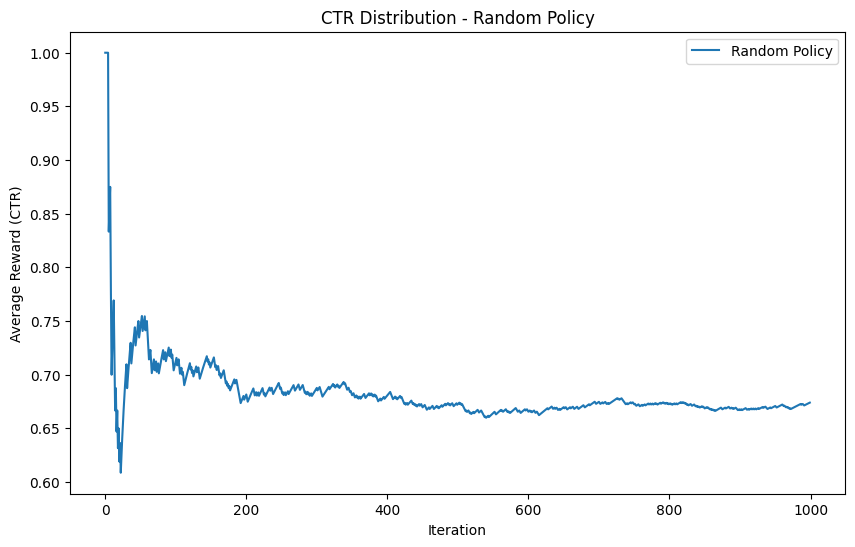

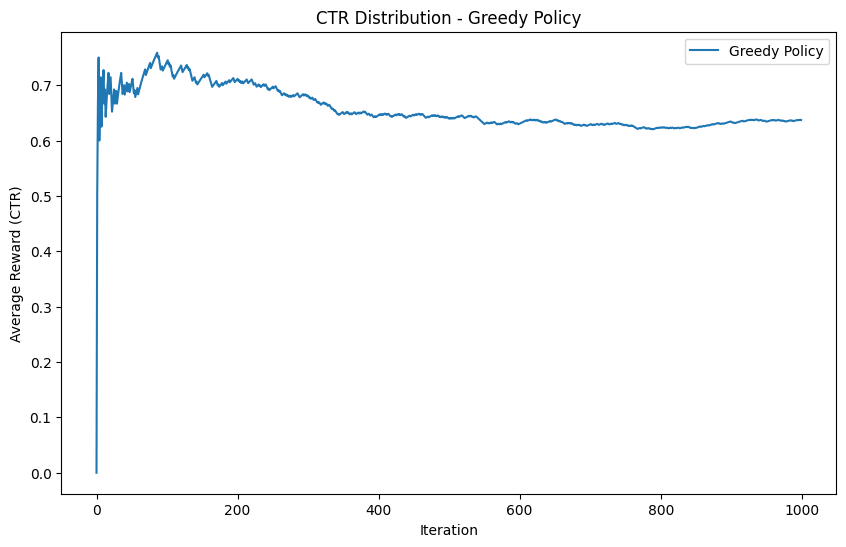

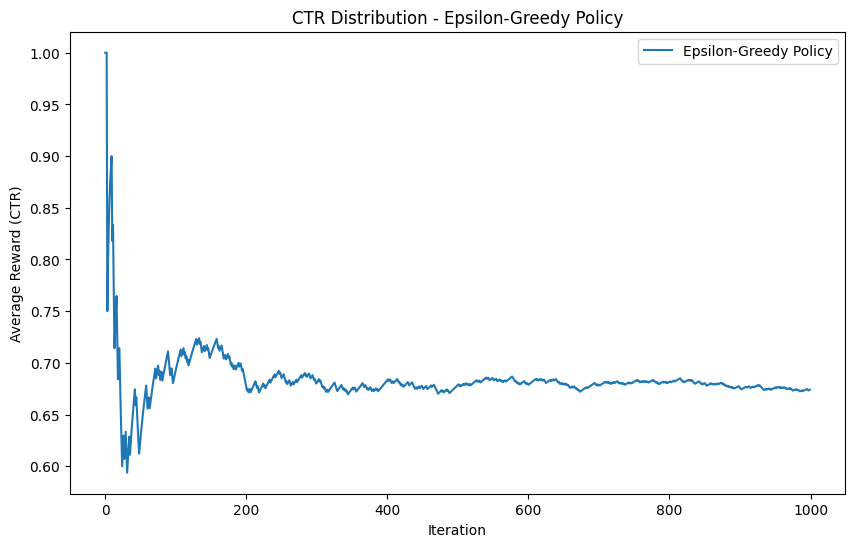

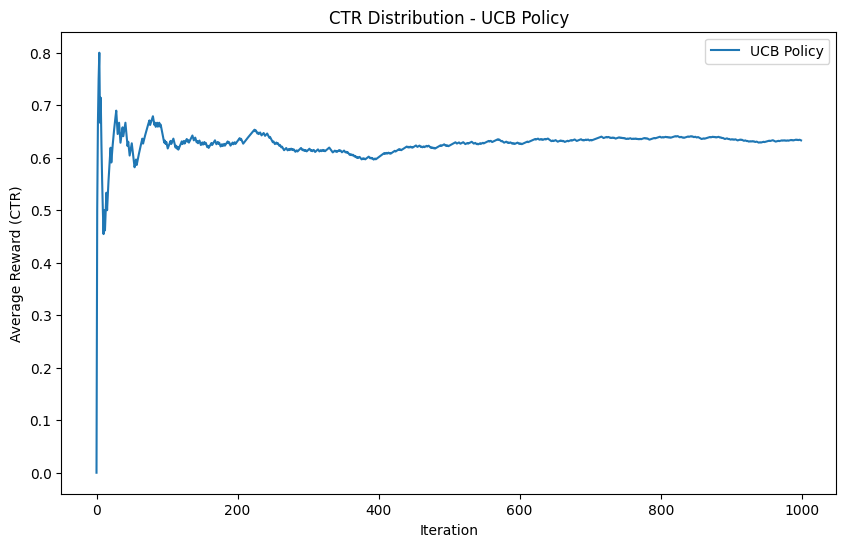

In [21]:
#-----write your code below this line---------

import matplotlib.pyplot as plt

# Store results for each approach
random_rewards = np.zeros(n_iterations)
greedy_rewards = np.zeros(n_iterations)
epsilon_greedy_rewards = np.zeros(n_iterations)
ucb_rewards = np.zeros(n_iterations)

# Random Policy
total_reward = 0
for i in range(n_iterations):
    arm = np.random.choice(n_arms)
    chosen_arm = arms[arm]
    reward = env.simulate_reward(chosen_arm)
    total_reward += reward
    random_rewards[i] = total_reward / (i + 1)

# Greedy Policy
rewards = np.zeros(n_arms)
selections = np.zeros(n_arms)
total_reward = 0
for i in range(n_iterations):
    if i < n_arms:
        arm = i
    else:
        arm = np.argmax(rewards / (selections + 1e-10))
    chosen_arm = arms[arm]
    reward = env.simulate_reward(chosen_arm)
    selections[arm] += 1
    rewards[arm] += reward
    total_reward += reward
    greedy_rewards[i] = total_reward / (i + 1)

# Epsilon-Greedy Policy
epsilon = 0.1
rewards = np.zeros(n_arms)
selections = np.zeros(n_arms)
total_reward = 0
for i in range(n_iterations):
    if np.random.rand() < epsilon:
        arm = np.random.choice(n_arms)
    else:
        arm = np.argmax(rewards / (selections + 1e-10))
    chosen_arm = arms[arm]
    reward = env.simulate_reward(chosen_arm)
    selections[arm] += 1
    rewards[arm] += reward
    total_reward += reward
    epsilon_greedy_rewards[i] = total_reward / (i + 1)

# UCB Policy
rewards = np.zeros(n_arms)
selections = np.zeros(n_arms)
total_reward = 0
for i in range(n_iterations):
    arm = 0
    max_upper_bound = 0
    for j in range(n_arms):
        if selections[j] > 0:
            average_reward = rewards[j] / selections[j]
            delta_i = math.sqrt(2 * math.log(i + 1) / selections[j])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            arm = j
    chosen_arm = arms[arm]
    reward = env.simulate_reward(chosen_arm)
    selections[arm] += 1
    rewards[arm] += reward
    total_reward += reward
    ucb_rewards[i] = total_reward / (i + 1)

# Plotting the results

# Random Policy Plot
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), random_rewards, label='Random Policy')
plt.xlabel('Iteration')
plt.ylabel('Average Reward (CTR)')
plt.title('CTR Distribution - Random Policy')
plt.legend()
plt.show()

# Greedy Policy Plot
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), greedy_rewards, label='Greedy Policy')
plt.xlabel('Iteration')
plt.ylabel('Average Reward (CTR)')
plt.title('CTR Distribution - Greedy Policy')
plt.legend()
plt.show()

# Epsilon-Greedy Policy Plot
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), epsilon_greedy_rewards, label='Epsilon-Greedy Policy')
plt.xlabel('Iteration')
plt.ylabel('Average Reward (CTR)')
plt.title('CTR Distribution - Epsilon-Greedy Policy')
plt.legend()
plt.show()

# UCB Policy Plot
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), ucb_rewards, label='UCB Policy')
plt.xlabel('Iteration')
plt.ylabel('Average Reward (CTR)')
plt.title('CTR Distribution - UCB Policy')
plt.legend()
plt.show()


# Changing Exploration Percentage (1M)
* How does changing the exploration percentage (EXPLORE_PERCENTAGE) affect the performance of the algorithm? Test with different values (e.g. 0.15 and 0.2) and discuss the results.


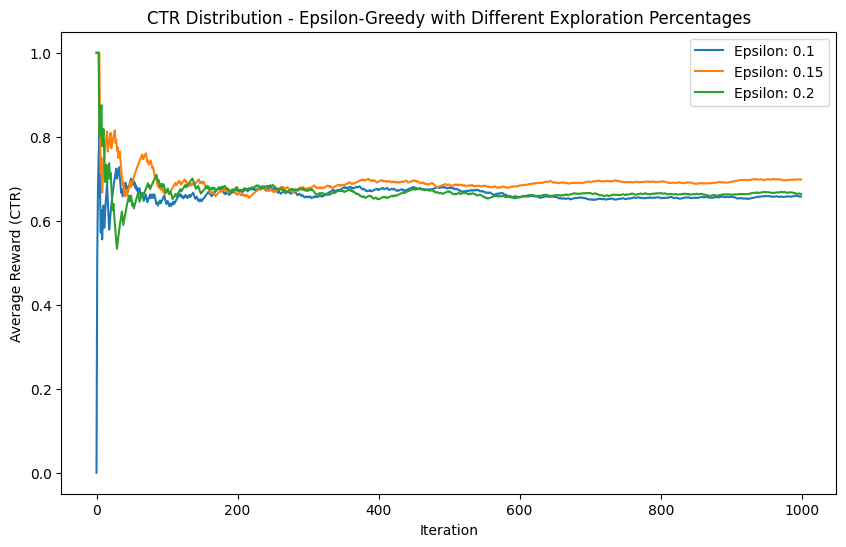

In [22]:
#Implement with any MAB algorithm
#Try with different EXPLORE_PERCENTAGE
#Different value of alpha

# Function to run the epsilon-greedy policy with a given epsilon
def run_epsilon_greedy(epsilon, n_iterations=1000):
    rewards = np.zeros(n_arms)
    selections = np.zeros(n_arms)
    total_reward = 0
    average_rewards = []

    for i in range(n_iterations):
        if np.random.rand() < epsilon:
            arm = np.random.choice(n_arms)
        else:
            arm = np.argmax(rewards / (selections + 1e-10))
        chosen_arm = arms[arm]
        reward = env.simulate_reward(chosen_arm)
        selections[arm] += 1
        rewards[arm] += reward
        total_reward += reward
        average_rewards.append(total_reward / (i + 1))

    return average_rewards

# Define different exploration percentages to test
exploration_percentages = [0.1, 0.15, 0.2]
results = {}

# Run the epsilon-greedy policy with different exploration percentages
for epsilon in exploration_percentages:
    average_rewards = run_epsilon_greedy(epsilon)
    results[epsilon] = average_rewards

# Plot the results
plt.figure(figsize=(10, 6))
for epsilon, average_rewards in results.items():
    plt.plot(range(n_iterations), average_rewards, label=f'Epsilon: {epsilon}')
plt.xlabel('Iteration')
plt.ylabel('Average Reward (CTR)')
plt.title('CTR Distribution - Epsilon-Greedy with Different Exploration Percentages')
plt.legend()
plt.show()


# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for maximizing the CTR using random, greedy, epsilon-greedy and UCB.

`----write below this line------`

Among the tested policies, the UCB policy emerged as the best approach for maximizing CTR. It effectively balances exploration and exploitation, adapting dynamically based on the observed rewards and uncertainties. The ε-Greedy policy also performed well, especially with a moderate exploration rate. The greedy policy, while simple, was prone to suboptimal convergence, and the random policy, though ensuring exploration, failed to exploit known high-performing ads. Therefore, for maximizing CTR in digital advertising, UCB is recommended, with ε-Greedy as a strong alternative when simplicity and adjustable exploration rates are desired.